## Reading grid jsons 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams["figure.figsize"] = (7,7)
#plt.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json
from pathlib import Path

from pylatex import Document, Package, Section, NoEscape
 
## Read file names
path_to_json = Path(os.getcwd() + "/CPU_and_GPU/cpu-grid-results/").glob("**/*.json")
CPU_files_grid = [str(path) for path in path_to_json]

path_to_json = Path(os.getcwd() + "/CPU_and_GPU/gpu-grid-results/").glob("**/*.json")
GPU_files_grid = [str(path) for path in path_to_json]

# Read json of CPU file
CPU_data_grid_to_append = []
for files in CPU_files_grid:
    CPU_data_grid_to_append.append(pd.read_json(files, typ='series', orient='index'))

# Read json of GPU file
GPU_data_to_append_grid = []
for files in GPU_files_grid:
    GPU_data_to_append_grid.append(pd.read_json(files, typ='series', orient='index'))

##Concat all dataframe and transpose it
CPU_data_time_grid = pd.concat(CPU_data_grid_to_append, axis=1)
CPU_data_time_grid = CPU_data_time_grid.transpose()

##Concat all dataframe and transpose it
GPU_data_time_grid = pd.concat(GPU_data_to_append_grid, axis=1)
GPU_data_time_grid = GPU_data_time_grid.transpose()


# Drop column parallel from GPU_data_time_grid
GPU_data_time_grid = GPU_data_time_grid.drop(columns=['parallel'])

#Geometric data as integer
CPU_data_time_grid['n_vertices'] = CPU_data_time_grid['n_vertices'].astype(int)
CPU_data_time_grid['n_half_edges'] = CPU_data_time_grid['n_half_edges'].astype(int)
CPU_data_time_grid['n_faces'] = CPU_data_time_grid['n_faces'].astype(int)
CPU_data_time_grid['n_barrier_edge_tips'] = CPU_data_time_grid['n_barrier_edge_tips'].astype(int)

GPU_data_time_grid['n_vertices'] = GPU_data_time_grid['n_vertices'].astype(int)
GPU_data_time_grid['n_half_edges'] = GPU_data_time_grid['n_half_edges'].astype(int)
GPU_data_time_grid['n_faces'] = GPU_data_time_grid['n_faces'].astype(int)
GPU_data_time_grid['n_barrier_edge_tips'] = GPU_data_time_grid['n_barrier_edge_tips'].astype(int)

#Group by n_vertices and sort by n_vertices in ascending order
CPU_data_time_grid = CPU_data_time_grid.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')
GPU_data_time_grid = GPU_data_time_grid.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')



## Convert byte to gb
CPU_data_time_grid['memory_max_edges'] = CPU_data_time_grid['memory_max_edges'] / (1024 ** 3)
CPU_data_time_grid['memory_frontier_edge'] = CPU_data_time_grid['memory_frontier_edge'] / (1024 ** 3)
CPU_data_time_grid['memory_seed_edges'] = CPU_data_time_grid['memory_seed_edges'] / (1024 ** 3)
CPU_data_time_grid['memory_seed_bet_mar'] = CPU_data_time_grid['memory_seed_bet_mar'] / (1024 ** 3)
CPU_data_time_grid['memory_triangle_list'] = CPU_data_time_grid['memory_triangle_list'] / (1024 ** 3)
CPU_data_time_grid['memory_mesh_input'] = CPU_data_time_grid['memory_mesh_input'] / (1024 ** 3)
CPU_data_time_grid['memory_mesh_output'] = CPU_data_time_grid['memory_mesh_output'] / (1024 ** 3)
CPU_data_time_grid['memory_vertices_input'] = CPU_data_time_grid['memory_vertices_input'] / (1024 ** 3)
CPU_data_time_grid['memory_vertices_output'] = CPU_data_time_grid['memory_vertices_output'] / (1024 ** 3)
CPU_data_time_grid['memory_total'] = CPU_data_time_grid['memory_total'] / (1024 ** 3)

# Convertir las columnas de bytes a GB
GPU_data_time_grid['memory_max_edges'] = GPU_data_time_grid['memory_max_edges'] / (1024 ** 3)
GPU_data_time_grid['memory_frontier_edge'] = GPU_data_time_grid['memory_frontier_edge'] / (1024 ** 3)
GPU_data_time_grid['memory_seed_edges'] = GPU_data_time_grid['memory_seed_edges'] / (1024 ** 3)
GPU_data_time_grid['memory_seed_bet_mar'] = GPU_data_time_grid['memory_seed_bet_mar'] / (1024 ** 3)
GPU_data_time_grid['memory_triangle_list'] = GPU_data_time_grid['memory_triangle_list'] / (1024 ** 3)
GPU_data_time_grid['memory_mesh_input'] = GPU_data_time_grid['memory_mesh_input'] / (1024 ** 3)
GPU_data_time_grid['memory_mesh_output'] = GPU_data_time_grid['memory_mesh_output'] / (1024 ** 3)
GPU_data_time_grid['memory_vertices_input'] = GPU_data_time_grid['memory_vertices_input'] / (1024 ** 3)
GPU_data_time_grid['memory_vertices_output'] = GPU_data_time_grid['memory_vertices_output'] / (1024 ** 3)
GPU_data_time_grid['memory_total'] = GPU_data_time_grid['memory_total'] / (1024 ** 3)
GPU_data_time_grid['memory_total_gpu'] = GPU_data_time_grid['memory_total_gpu'] / (1024 ** 3)

# sumar los tiempos de las diferentes operaciones
GPU_data_time_grid['d_total_time'] = GPU_data_time_grid['d_time_copy_to_device'] + \
                                GPU_data_time_grid['d_time_to_label_max_edges'] + \
                                GPU_data_time_grid['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_grid['d_time_to_label_seed_edges'] + \
                                GPU_data_time_grid['d_time_to_label_scan_edges'] + \
                                GPU_data_time_grid['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_grid['d_time_to_label_total'] + \
                                GPU_data_time_grid['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_grid['d_time_to_traversal'] + \
                                GPU_data_time_grid['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_grid['d_time_to_back_to_host'] + \
                                GPU_data_time_grid['d_time_to_repair']

GPU_data_time_grid['d_total_time_no_copy'] = GPU_data_time_grid['d_time_to_label_max_edges'] + \
                                GPU_data_time_grid['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_grid['d_time_to_label_seed_edges'] + \
                                GPU_data_time_grid['d_time_to_label_scan_edges'] + \
                                GPU_data_time_grid['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_grid['d_time_to_label_total'] + \
                                GPU_data_time_grid['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_grid['d_time_to_traversal'] + \
                                GPU_data_time_grid['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_grid['d_time_to_repair']


# create new datadrame with the n_vertices of CPU, the d_total_time_no_copy, d_total_time  of GPU and the time_to_generate_polygonal_mesh of CPU
df_speedup = pd.DataFrame({'n_vertices': CPU_data_time_grid['n_vertices'], 'd_total_time_no_copy': GPU_data_time_grid['d_total_time_no_copy'], 'd_total_time': GPU_data_time_grid['d_total_time'], 'time_to_generate_polygonal_mesh': CPU_data_time_grid['time_to_generate_polygonal_mesh']})



# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time_no_copy
df_speedup['speedup'] = df_speedup['time_to_generate_polygonal_mesh'] / df_speedup['d_total_time_no_copy']

# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time
df_speedup['speedup_with_copy'] = df_speedup['time_to_generate_polygonal_mesh'] / df_speedup['d_total_time']


# Reading uniform results

In [2]:

## Read file names
path_to_json = Path(os.getcwd() + "/CPU_and_GPU/cpu-uniform-results/").glob("**/*.json")
CPU_files_uniform = [str(path) for path in path_to_json]

path_to_json = Path(os.getcwd() + "/CPU_and_GPU/gpu-uniform-results/").glob("**/*.json")
GPU_files_uniform = [str(path) for path in path_to_json]

# Read json of CPU file
CPU_data_uniform_to_append = []
for files in CPU_files_uniform:
    CPU_data_uniform_to_append.append(pd.read_json(files, typ='series', orient='index'))

# Read json of GPU file
GPU_data_to_append_uniform = []
for files in GPU_files_uniform:
    GPU_data_to_append_uniform.append(pd.read_json(files, typ='series', orient='index'))

##Concat all dataframe and transpose it
CPU_data_time_uniform = pd.concat(CPU_data_uniform_to_append, axis=1)
CPU_data_time_uniform = CPU_data_time_uniform.transpose()

##Concat all dataframe and transpose it
GPU_data_time_uniform = pd.concat(GPU_data_to_append_uniform, axis=1)
GPU_data_time_uniform = GPU_data_time_uniform.transpose()


# Drop column parallel from GPU_data_time_uniform
GPU_data_time_uniform = GPU_data_time_uniform.drop(columns=['parallel'])

#Geometric data as integer
CPU_data_time_uniform['n_vertices'] = CPU_data_time_uniform['n_vertices'].astype(int)
CPU_data_time_uniform['n_half_edges'] = CPU_data_time_uniform['n_half_edges'].astype(int)
CPU_data_time_uniform['n_faces'] = CPU_data_time_uniform['n_faces'].astype(int)
CPU_data_time_uniform['n_barrier_edge_tips'] = CPU_data_time_uniform['n_barrier_edge_tips'].astype(int)

GPU_data_time_uniform['n_vertices'] = GPU_data_time_uniform['n_vertices'].astype(int)
GPU_data_time_uniform['n_half_edges'] = GPU_data_time_uniform['n_half_edges'].astype(int)
GPU_data_time_uniform['n_faces'] = GPU_data_time_uniform['n_faces'].astype(int)
GPU_data_time_uniform['n_barrier_edge_tips'] = GPU_data_time_uniform['n_barrier_edge_tips'].astype(int)

#Group by n_vertices and sort by n_vertices in ascending order
CPU_data_time_uniform = CPU_data_time_uniform.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')
GPU_data_time_uniform = GPU_data_time_uniform.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')



## Convert byte to gb
CPU_data_time_uniform['memory_max_edges'] = CPU_data_time_uniform['memory_max_edges'] / (1024 ** 3)
CPU_data_time_uniform['memory_frontier_edge'] = CPU_data_time_uniform['memory_frontier_edge'] / (1024 ** 3)
CPU_data_time_uniform['memory_seed_edges'] = CPU_data_time_uniform['memory_seed_edges'] / (1024 ** 3)
CPU_data_time_uniform['memory_seed_bet_mar'] = CPU_data_time_uniform['memory_seed_bet_mar'] / (1024 ** 3)
CPU_data_time_uniform['memory_triangle_list'] = CPU_data_time_uniform['memory_triangle_list'] / (1024 ** 3)
CPU_data_time_uniform['memory_mesh_input'] = CPU_data_time_uniform['memory_mesh_input'] / (1024 ** 3)
CPU_data_time_uniform['memory_mesh_output'] = CPU_data_time_uniform['memory_mesh_output'] / (1024 ** 3)
CPU_data_time_uniform['memory_vertices_input'] = CPU_data_time_uniform['memory_vertices_input'] / (1024 ** 3)
CPU_data_time_uniform['memory_vertices_output'] = CPU_data_time_uniform['memory_vertices_output'] / (1024 ** 3)
CPU_data_time_uniform['memory_total'] = CPU_data_time_uniform['memory_total'] / (1024 ** 3)

# Convertir las columnas de bytes a GB
GPU_data_time_uniform['memory_max_edges'] = GPU_data_time_uniform['memory_max_edges'] / (1024 ** 3)
GPU_data_time_uniform['memory_frontier_edge'] = GPU_data_time_uniform['memory_frontier_edge'] / (1024 ** 3)
GPU_data_time_uniform['memory_seed_edges'] = GPU_data_time_uniform['memory_seed_edges'] / (1024 ** 3)
GPU_data_time_uniform['memory_seed_bet_mar'] = GPU_data_time_uniform['memory_seed_bet_mar'] / (1024 ** 3)
GPU_data_time_uniform['memory_triangle_list'] = GPU_data_time_uniform['memory_triangle_list'] / (1024 ** 3)
GPU_data_time_uniform['memory_mesh_input'] = GPU_data_time_uniform['memory_mesh_input'] / (1024 ** 3)
GPU_data_time_uniform['memory_mesh_output'] = GPU_data_time_uniform['memory_mesh_output'] / (1024 ** 3)
GPU_data_time_uniform['memory_vertices_input'] = GPU_data_time_uniform['memory_vertices_input'] / (1024 ** 3)
GPU_data_time_uniform['memory_vertices_output'] = GPU_data_time_uniform['memory_vertices_output'] / (1024 ** 3)
GPU_data_time_uniform['memory_total'] = GPU_data_time_uniform['memory_total'] / (1024 ** 3)
GPU_data_time_uniform['memory_total_gpu'] = GPU_data_time_uniform['memory_total_gpu'] / (1024 ** 3)

# sumar los tiempos de las diferentes operaciones
GPU_data_time_uniform['d_total_time'] = GPU_data_time_uniform['d_time_copy_to_device'] + \
                                GPU_data_time_uniform['d_time_to_label_max_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_seed_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_scan_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_total'] + \
                                GPU_data_time_uniform['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_uniform['d_time_to_traversal'] + \
                                GPU_data_time_uniform['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_uniform['d_time_to_back_to_host'] + \
                                GPU_data_time_uniform['d_time_to_repair']

GPU_data_time_uniform['d_total_time_no_copy'] = GPU_data_time_uniform['d_time_to_label_max_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_seed_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_scan_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_total'] + \
                                GPU_data_time_uniform['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_uniform['d_time_to_traversal'] + \
                                GPU_data_time_uniform['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_uniform['d_time_to_repair']


# create new datadrame with the n_vertices of CPU, the d_total_time_no_copy, d_total_time  of GPU and the time_to_generate_polygonal_mesh of CPU
df_speedup = pd.DataFrame({'n_vertices': CPU_data_time_uniform['n_vertices'], 'd_total_time_no_copy': GPU_data_time_uniform['d_total_time_no_copy'], 'd_total_time': GPU_data_time_uniform['d_total_time'], 'time_to_generate_polygonal_mesh': CPU_data_time_uniform['time_to_generate_polygonal_mesh']})



# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time_no_copy
df_speedup['speedup'] = df_speedup['time_to_generate_polygonal_mesh'] / df_speedup['d_total_time_no_copy']

# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time
df_speedup['speedup_with_copy'] = df_speedup['time_to_generate_polygonal_mesh'] / df_speedup['d_total_time']

# Gráficos grid

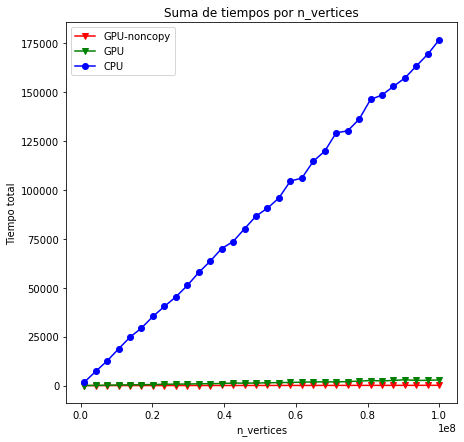

In [3]:
# graficar la suma de los tiempos por n_vertices
import matplotlib.pyplot as plt

plt.plot(GPU_data_time_grid['n_vertices'], GPU_data_time_grid['d_total_time_no_copy'],  c="red",marker="v", label='GPU-noncopy')
plt.plot(GPU_data_time_grid['n_vertices'], GPU_data_time_grid['d_total_time'],  c="green",marker="v", label='GPU')
plt.plot(CPU_data_time_grid['n_vertices'], CPU_data_time_grid['time_to_generate_polygonal_mesh'], c="blue",marker="o", label='CPU')
plt.xlabel('n_vertices')
plt.ylabel('Tiempo total')
plt.title('Suma de tiempos por n_vertices')
plt.legend()
plt.show()


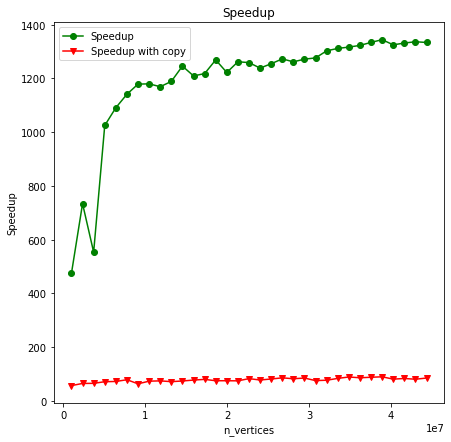

In [4]:
# Plot speedup
plt.plot(df_speedup['n_vertices'], df_speedup['speedup'], c="green",marker="o", label='Speedup')
plt.plot(df_speedup['n_vertices'], df_speedup['speedup_with_copy'], c="red",marker="v", label='Speedup with copy')
plt.xlabel('n_vertices')
plt.ylabel('Speedup')
plt.title('Speedup')
plt.legend()
plt.show()


# Preguntas

In [5]:
# Cuanto es el promedio del speedup
print("Promedio del speedup: ", df_speedup['speedup'].mean())

# Cuanto es el promedio del speedup con copia
print("Promedio del speedup con copia: ", df_speedup['speedup_with_copy'].mean())

# Comparar el speed up de delaunay y uniforme



Promedio del speedup:  1189.8305167190695
Promedio del speedup con copia:  77.89476749078266


# Graficos Uniform